Итоговая работа

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
%matplotlib inline

1. Загрузить файл hr.csv

In [2]:
data=pd.read_csv('HR.csv')

In [3]:
data.head(7)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

Некоторые исследуемые значения получим с помощью метода describe

In [4]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Средние значения переменных в строке mean, мин/макс соответственно в min и max, медиана - в 50%
Медиана не имеет смысла в колонках Work_accident, left и promotion_last_5years, поскольку значения в них бинарные
Колонки sales и salary имеют нечисловые значения, поэтому перечисленные статистические данные не могут быть для них рассчитаны

Посчитаем моду:

In [5]:
for i in data.columns:
    try:
        print('Мода для ',i,' - ',statistics.mode(data[i]))
    except:
        print('Моду для ',i,'определить невозможно')

Мода для  satisfaction_level  -  0.1
Мода для  last_evaluation  -  0.55
Мода для  number_project  -  4
Моду для  average_montly_hours определить невозможно
Мода для  time_spend_company  -  3
Мода для  Work_accident  -  0
Мода для  left  -  0
Мода для  promotion_last_5years  -  0
Мода для  sales  -  sales
Мода для  salary  -  low


Моду для  average_montly_hours определить невозможно, так как либо все значения в столбце уникальные, либо несколько из них имеют наибольшее число повторений

Посчитаем среднеквадратичное отклонение:

In [6]:
for i in data.columns:
    try:
        print('Среднеквадратичное отклонение для ',i,' - ',round(statistics.stdev(data[i]),4))
    except:
        print('Среднеквадратичное отклонение для ',i,'посчитать невозможно')

Среднеквадратичное отклонение для  satisfaction_level  -  0.2486
Среднеквадратичное отклонение для  last_evaluation  -  0.1712
Среднеквадратичное отклонение для  number_project  -  1.2326
Среднеквадратичное отклонение для  average_montly_hours  -  49.9431
Среднеквадратичное отклонение для  time_spend_company  -  1.4601
Среднеквадратичное отклонение для  Work_accident  -  0.3517
Среднеквадратичное отклонение для  left  -  0.4259
Среднеквадратичное отклонение для  promotion_last_5years  -  0.1443
Среднеквадратичное отклонение для  sales посчитать невозможно
Среднеквадратичное отклонение для  salary посчитать невозможно


Для столбцов sales и salary отклонение посчитать невозможно, так как значения нечисловые

3. Рассчитать и визуализировать корреляционную матрицу для переменных

Прежде, чем делать матрицу корреляций, хочется все-таки приспособить к использованию информацию из колонки salary. Хоть там и нечисленные значения, низкую, среднюю и высокую зарплаты все же можно условно ранжировать и, возможно, даже найти некую корреляцию с другими переменными.
Для этого мы обозначим низкую зарплату, как 1, среднюю, как 2, и высокую, как 3

In [7]:
def salary2digit(row):
    if row['salary']=='high':
        return 3
    elif row['salary']=='low':
        return 1
    elif row['salary']=='medium':
        return 2

In [8]:
data['salary2']=data.apply(salary2digit, axis=1)

Матрица корреляций

In [9]:
corr_matrix=data.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary2
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary2,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


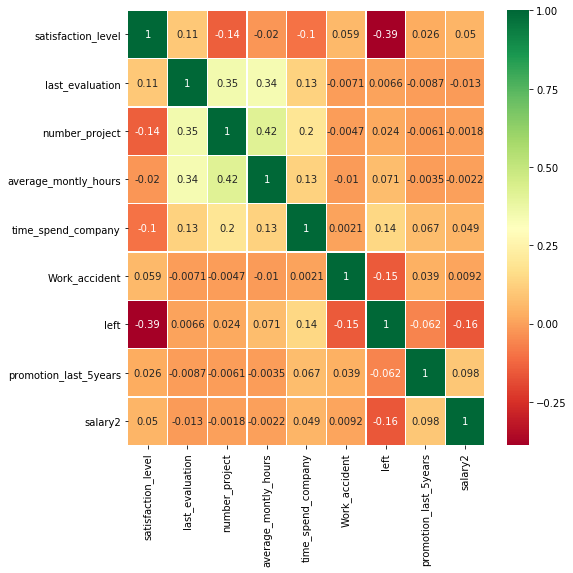

In [10]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

По матрице видно, что сильных корреляций между переменными нет.
Можно отметить относительно высокую зависимость между number_project (видимо, количество проектов, в которых участвовал/участвует сотрудник) и average_montly_hours	(видимо, среднее кол-во часов, проведенных на работе в месяц), что логично - чем больше проектов, тем больше нужно на них времени
Из обратных корреляций стоит отметить зависимость left и satisfaction_level. Что тоже логично, чем ниже уровень удовлетворения от работы, тем выше шанс, что сотрудник покинет компанию.
Так же обратим внимание на корреляцию переменных left и salary2. Отрицательная величина говорит нам о том, что сотрудники с большой зарплатой имеют тенденцию к сохранению своего места в компании

4. Визуализировать несколько взаимосвязей между переменными

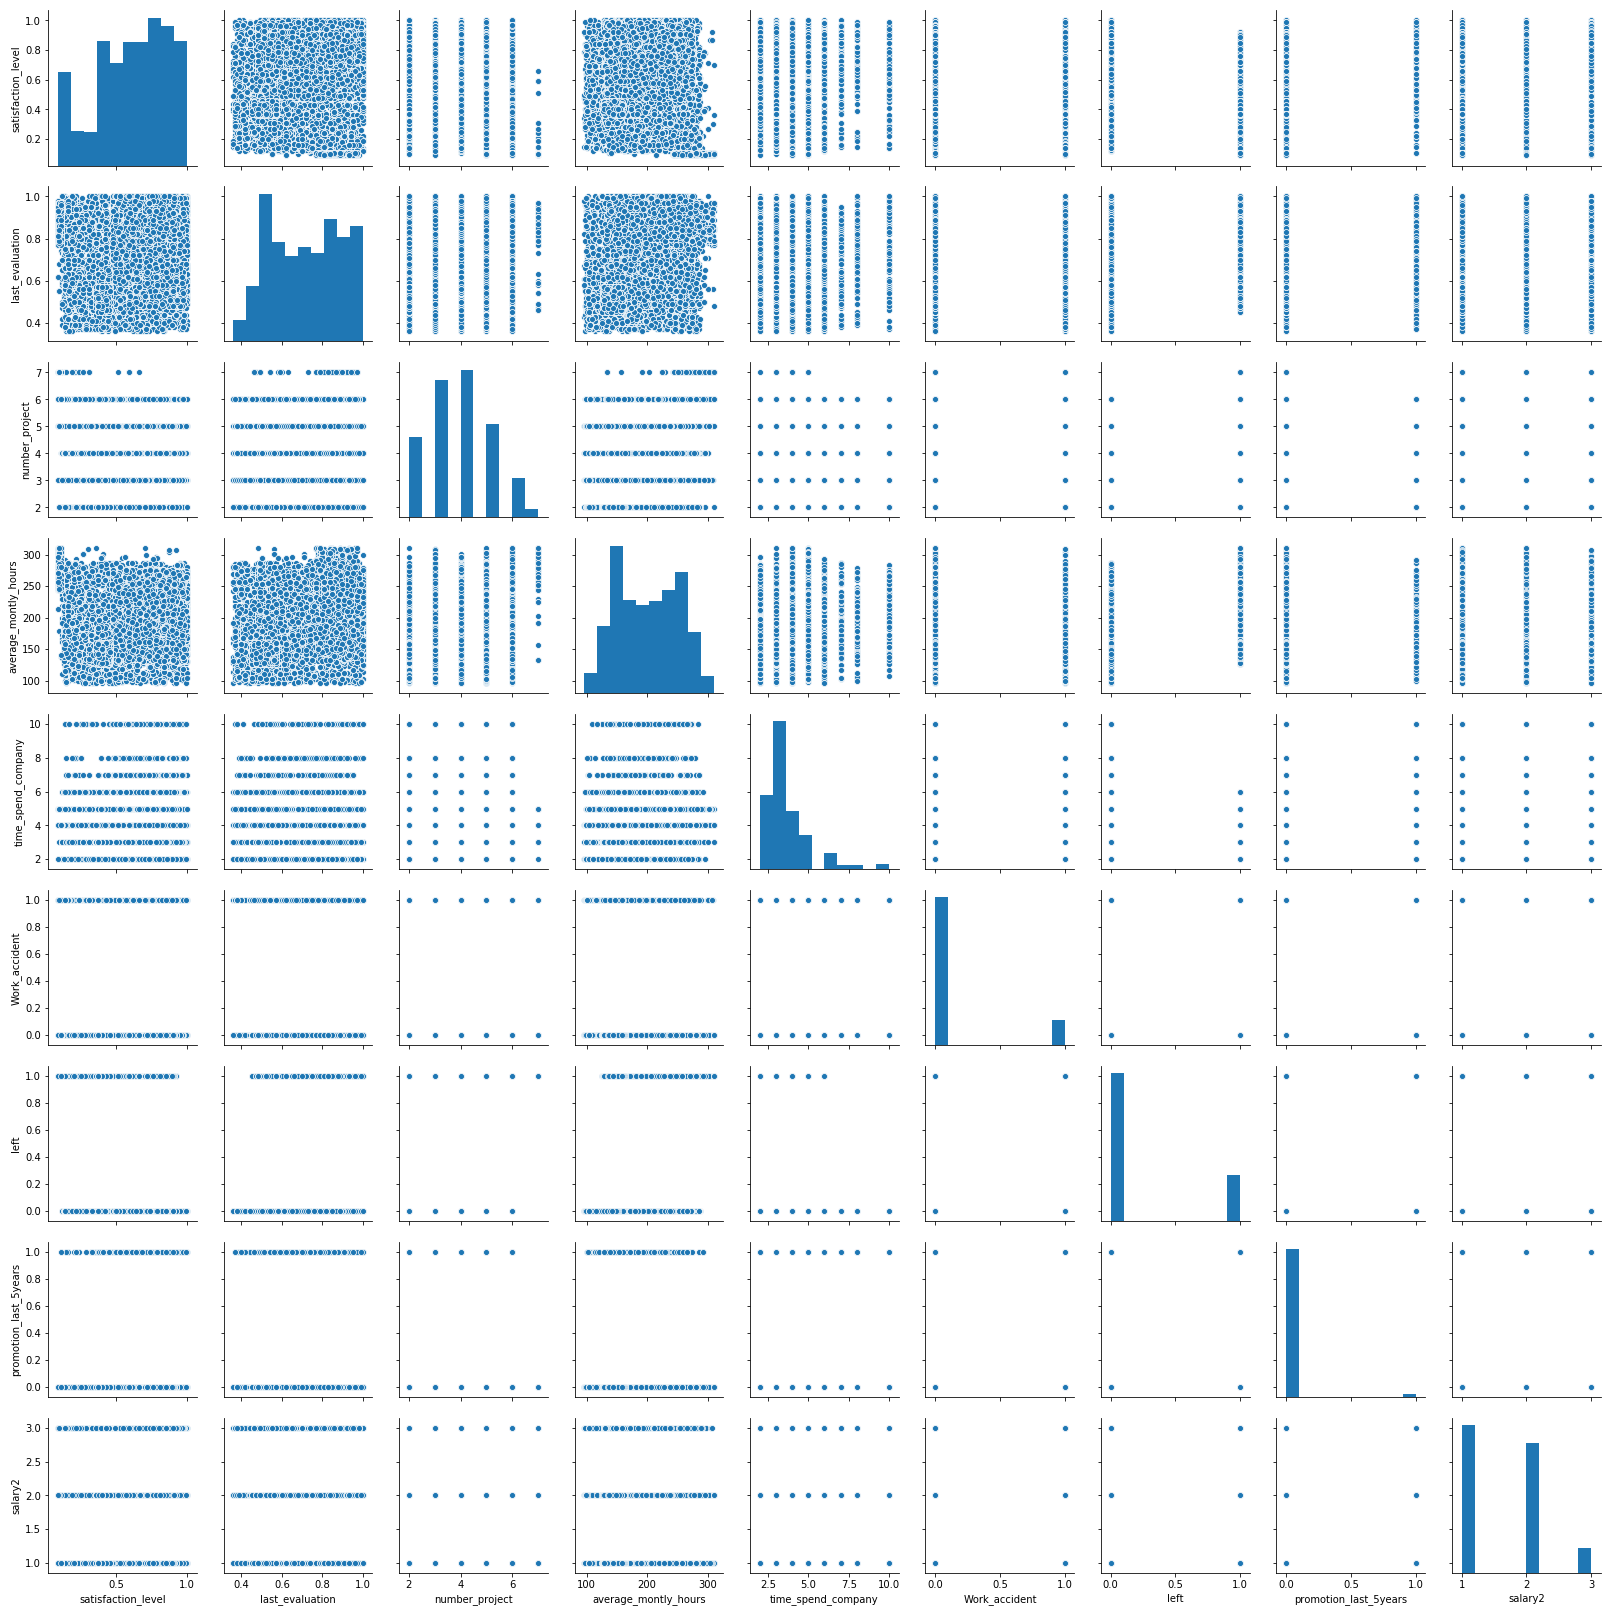

In [11]:
sns.pairplot(data, kind='scatter')

Видно, что Pairplot не особо наглядно показывает взаимосвязи. Попробуем визуализировать переменные попарно.
Сперва визуализирую зависимости с самой высокой корреляцией, о которых упомянул в блоке выше. Надо отметить, что это зависимости между дискретными и непрерывными переменными, что имеет соответствующее отображение на графиках (высокую плотность значений и сливание точек). Поэтому поменяю формат графика на kde для большей наглядности

Сначала зависимость между number_project и average_montly_hours

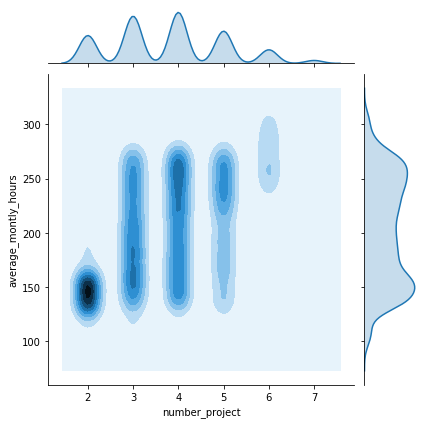

In [12]:
ax=sns.jointplot(x='number_project', y='average_montly_hours', 
              data=data, kind='kde')

График нам показывает, что сотрудники в компании имеют от 2 до 7 проектов. Кроме случаев с 2 и 7 проектами, распределение по рабочим часам почти равномерное. 
Стоит отметить, что в этой компании сотрудники в среднем существенно перерабатывают российскую норму в 168 часов в месяц. Возможно, мы имеем дело с датасетом японской или южнокорейской компании, где такое в порядке вещей

Вторая визуализация для left и satisfaction_level

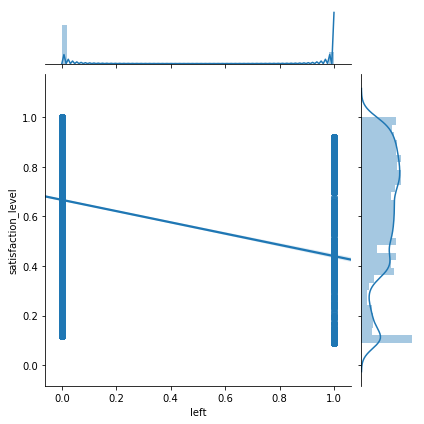

In [13]:
ax=sns.jointplot(x='left', y='satisfaction_level', 
              data=data, kind='reg')

Из этого графика можем отметить, что сотрудники, имеющие удовлетворенность от работы 95% и более, из компании не уходят.
В остальном, график совершенно неинформативный

Третий график сделаем для last_evaluation и average_montly_hours.
Здесь также очень большая плотность точек, поэтому применил формат kde для наглядности

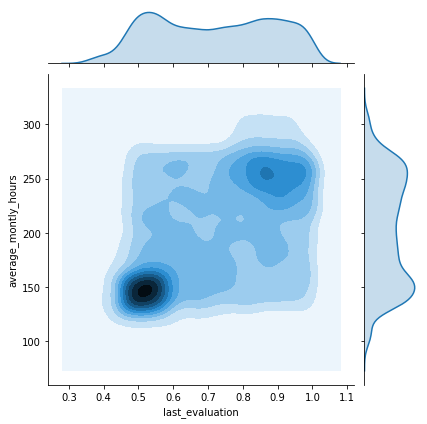

In [14]:
ax=sns.jointplot(x='last_evaluation', y='average_montly_hours', 
              data=data, kind='kde')

Здесь видим очень большую группу, которая не перерабатывает и при этом не имеет высоких оценок.
Также бросается в глаза вторая группа в верхней правой части графика. Это, наоборот, "отличники", и у них большая месячная наработка

5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

1) Исследуем взаимосвязь last_evaluation ныне работающих и уволенных сотрудников

In [15]:
work=data[data['left']==0]['last_evaluation']
quit=data[data['left']==1]['last_evaluation']

In [16]:
stats.ttest_ind(work,quit)

Ttest_indResult(statistic=-0.8042416167796329, pvalue=0.4212701963735056)

pvalue  получилось 0,42. 
Но проверим, насколько корректно было применять этот тест.
Сначала посмотрим на распределение

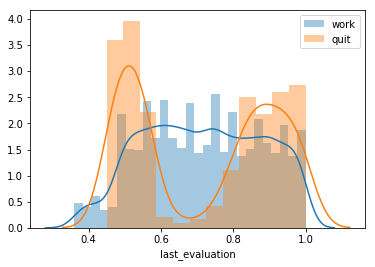

In [17]:
sns.distplot(work)
sns.distplot(quit)
plt.legend(['work', 'quit'])
plt.show()

Видно, что распределение quit ненормальное.
Для такого распределения подойдет критерий Манна-Уитни

In [18]:
u, p_value = stats.mannwhitneyu(work,quit)
p_value

0.3825174633239001

Поскольку размеры выборок work и quit не равны, попробуем провести тест на равных по размеру семплах

In [19]:
work_sample=work.sample(n=100)
quit_sample=quit.sample(n=100)

In [20]:
u, p_value = stats.mannwhitneyu(work_sample,quit_sample)
p_value

0.27833174006591566

pvalue все равно оказалось выше 0,05, что говорит о неверности нулевой гипотезы, то есть, выборки статистически различны

2) Исследуем взаимосвязь last_evaluation ныне работающих сотрудников, имеющих разные зарплаты

In [21]:
low_salary=data[data['salary2']==1]['last_evaluation']
mid_salary=data[data['salary2']==2]['last_evaluation']
high_salary=data[data['salary2']==3]['last_evaluation']

In [22]:
stats.f_oneway(low_salary, mid_salary, high_salary)

F_onewayResult(statistic=3.1973320102081555, pvalue=0.04089896616654419)

Pvalue получилось ниже 0,05, что говорит о верности нулевой гипотезы.
Поскольку метод f_oneway (ANOVA) предполагает разные размеры исследуемых выборок, мы не будем делать тест для одноразмерных семплов.

6. Рассчитать сколько работников работает в каждом департаменте

В данном задании подразумеваю, что интересует только выборка сотрудников, не успевших покинуть компанию к моменту формирования датасета, т.е. имеющих 0 в графе left.
Поэтому сделаю предварительную фильтрацию

In [23]:
data2=data[data['left']==0]

In [24]:
""" Для подсчета сотрудников сделаю группировку по столбцу sales, 
    посчитаю кол-во строк для каждой группы и выведу данные любого одного столбца"""
data2.groupby('sales').count()['left']

sales
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: left, dtype: int64

7. Показать распределение сотрудников по зарплатам

Также делаю подсчет распределения для сотрудников, находящихся в штате

In [25]:
data2.groupby(['salary']).count()['left']

salary
high      1155
low       5144
medium    5129
Name: left, dtype: int64

8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [40]:
data2.groupby(['sales','salary']).count()
data3=data2.groupby(['sales','salary']).count()
data4=data3[['left']]
data4.columns=['employees']
data4.unstack('salary')

employees             
salary           high   low medium
sales                             
IT                 79   437    438
RandD              47   309    310
accounting         69   259    235
hr                 39   243    242
management        224   121    194
marketing          71   276    308
product_mng        62   346    296
sales             255  1402   1469
support           133   757    784
technical         176   994    853

9. Сколько сотрудников покинули компанию

In [42]:
len(data[data['left']==1])

3571

10. Проверить несколько гипотез для данных, чтобы понять, почему сотрудники покидают компанию

1) Сотрудники, не имеющие повышения в последние 5 лет, склонны поменять работу

In [43]:
"""Для проверки этой гипотезы сделаем выборку сотрудников, работающих не менее 5 лет"""
data3=data[data['time_spend_company']>=5]

In [44]:
data3=data3[['promotion_last_5years','left']]
data3=pd.get_dummies(data3,columns=['promotion_last_5years'])
data3.columns=['left','not_promoted','promoted']
data4=data3.groupby('left').sum()
data4.head()

,not_promoted,promoted
left,,
0,1618.0,95.0
1,1041.0,1.0


На этой небольшой табличке сразу можно увидеть взаимосвязь между исследуемыми переменными. Сотрудники, получившие повышение в последние 5 лет, почти в 99% случаев не уходят из компании. Из тех же, кто не получал повышение, более 60% покинули компанию

Различные тесты по разным критериям и выборкам подтверждают статистическую взаимосвязь переменных
Гипотеза о влиянии повышения сотрудников на их лояльность компании подтверждена

In [45]:
stats.ttest_ind(data3.left,data3.promoted)

Ttest_indResult(statistic=34.75647056014501, pvalue=1.7213067627258672e-239)

In [46]:
stats.ttest_ind(data3.left,data3.not_promoted)

Ttest_indResult(statistic=-59.40931595745716, pvalue=0.0)

In [47]:
stats.stats.mannwhitneyu(data3.left,data3.not_promoted)

MannwhitneyuResult(statistic=1567595.0, pvalue=0.0)

In [48]:
stats.ttest_ind(data.left,data.promotion_last_5years)

Ttest_indResult(statistic=59.04705286517299, pvalue=0.0)

In [49]:
1618/(1618+1041)

0.6084994358781497

2) Сотрудники, имевшие Work accident в последние 2 года, склонны поменять работу

In [50]:
"""Для проверки этой гипотезы сделаем выборку сотрудников, работающих не менее 2 лет"""
data5=data[data['time_spend_company']>=2]

In [51]:
data5=data5[['Work_accident','left']]
data5=pd.get_dummies(data5,columns=['Work_accident'])
data5.columns=['left','no_accident','have_accident']
data6=data5.groupby('left').sum()
data6.head()

,no_accident,have_accident
left,,
0,9428.0,2000.0
1,3402.0,169.0


Таблица показывает, что гипотеза неверна. Напротив, 92% имевших accident за последние два года, остались в компании

3) Работники уходят из-за низкой зарплаты

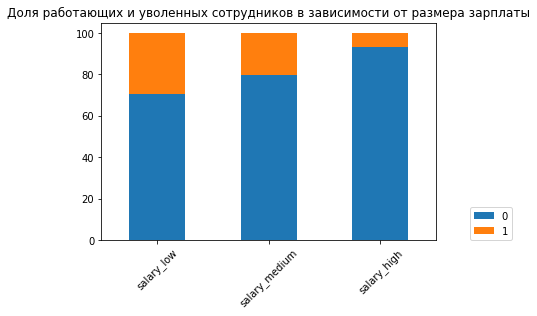

In [52]:
data7=data[['salary','left']]
data7=pd.get_dummies(data7,columns=['salary'])
data8=data7.groupby('left').sum()
neworder = ['salary_low','salary_medium','salary_high']
data10=data8.reindex(columns=neworder)
data11=data10.apply(lambda x: 100*x/data10.sum(), axis = 1)
data11=data11.T
ax=data11.plot(kind='bar', rot=45, stacked=True,\
               title='Доля работающих и уволенных сотрудников в зависимости от размера зарплаты')
ax.legend (loc=(1.1, 0.0))
plt.show()

На данном графике видно, что чем выше зарплата, тем выше лояльность сотрудников к компании. Если с высокой зарплатой отток сотрудников менее 7%, но с среди сотрудников с низкой зарплатой отток уже почти 30%.
Гипотеза подтверждена